# Week 7: Probabilistic ML
## Machine Learning - Lecture 3

**Author:** Shaahid Ahmed Nadeem

---

# Logistic Regression

## **1. What is Logistic Regression?**

Logistic Regression is a **classification algorithm** used when we want to predict one of two possible outcomes:
- Spam vs Not Spam
- Disease vs No Disease  
- Positive vs Negative
- Pass vs Fail

Unlike Linear Regression that predicts numbers, Logistic Regression predicts **probabilities** between 0 and 1.

---

## **2. Why Can't We Use Linear Regression?**

Imagine trying to fit a straight line through classification data:

```
    ×
1   |    ×
|   |       ×
|   |          ×
0   +---+---+---+--->
    0   1   2   3
```

**Problems:**
- Linear regression can predict values outside [0,1] (like -0.2 or 1.5)
- One outlier can drastically change the line
- It doesn't model probability well

**Solution:** We need an **S-shaped curve** that always stays between 0 and 1.

---

## **3. The Magic Sigmoid Function**

The sigmoid function transforms any number into a probability:

```
σ(z) = 1 / (1 + e^(-z))
```

**What it looks like:**
```
Probability
1 |        ┌───
  |      /
  |    /
0.5|  /
  | /
  |/
0 +-----+-----+-----
  -3    0     3
```

**Key Features:**
- Always between **0** and **1**
- Smooth S-shape
- σ(0) = 0.5
- Smooth and differentiable (good for optimization)

---

## **4. How Logistic Regression Works**

### **Step 1: Linear Combination**
First, we calculate a score like in linear regression:
```
z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b
```

### **Step 2: Apply Sigmoid**
Then we convert this score to a probability:
```
ŷ = σ(z) = 1 / (1 + e^(-z))
```
![Sigmoid Function](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)
### **Step 3: Make a Prediction**
```
If ŷ ≥ 0.5 → Predict Class 1
If ŷ < 0.5  → Predict Class 0
```

**Example:** If ŷ = 0.73, we say "73% chance of being Class 1"

---

## **5. The Cost Function: Binary Cross-Entropy**

We can't use mean squared error (it doesn't work well with probabilities). Instead, we use:

```
Loss = - [y × log(ŷ) + (1-y) × log(1-ŷ)]
```

**Why this works:**
- If y=1 and ŷ=0.9 → small penalty
- If y=1 and ŷ=0.1 → large penalty
- If y=0 and ŷ=0.9 → large penalty
- If y=0 and ŷ=0.1 → small penalty

It **heavily penalizes confident wrong predictions**!

---

## **6. Training with Gradient Descent**

We learn the weights by minimizing the cost:

```
Repeat many times:
    w = w - learning_rate × ∂Loss/∂w
    b = b - learning_rate × ∂Loss/∂b
```

This is like rolling down a hill to find the lowest point of the cost function.

---

## **7. Step-by-Step Training Process**

1. **Initialize** weights randomly
2. **Forward Pass:**
   - Calculate z = wᵀx + b
   - Apply sigmoid: ŷ = σ(z)
   - Compute loss
3. **Backward Pass:**
   - Calculate gradients
   - Update weights
4. **Repeat** until loss stops improving

---

## **8. How Good is Our Model?**

Accuracy alone can be misleading! We use:

- **Confusion Matrix:** TP, TN, FP, FN
- **Precision:** Of all "Class 1" predictions, how many were correct?
- **Recall:** Of all actual "Class 1", how many did we find?
- **F1 Score:** Balance between precision and recall

---

## **9. Why Logistic Regression is Awesome**

- **Simple & Interpretable:** You can understand what each feature contributes
- **Fast:** Quick to train and predict
- **Probabilities:** Gives confidence scores, not just predictions
- **Great Baseline:** Always try this first before complex models!

---

## **10. When It Might Not Work**

- **Non-linear boundaries:** Can only draw straight lines (unless you engineer features)
- **Very complex patterns:** May need neural networks or tree-based models
- **Assumes linear relationship** between features and log-odds

---

## **Quick Summary**

| Aspect | What It Does |
|--------|--------------|
| **Input** | Features (x₁, x₂, ..., xₙ) |
| **Output** | Probability between 0 and 1 |
| **Core Function** | Sigmoid transforms linear output to probability |
| **Loss Function** | Binary Cross-Entropy |
| **Training** | Gradient Descent |
| **Use When** | Binary classification, interpretability matters |

Logistic Regression is your **go-to tool** for binary classification problems!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd

# Set style
plt.style.use('default')
sns.set_palette("husl")

class InteractiveLogisticRegression:
    def __init__(self):
        self.X, self.y = None, None
        self.model = None
        self.X_train, self.X_test, self.y_train, self.y_test = None, None, None, None

    def generate_data(self, n_samples=100, noise=0.2, random_state=42):
        """Generate synthetic binary classification data"""
        self.X, self.y = make_classification(
            n_samples=n_samples,
            n_features=2,
            n_redundant=0,
            n_informative=2,
            n_clusters_per_class=1,
            flip_y=noise,
            random_state=random_state
        )
        return self.X, self.y

    def plot_sigmoid_function(self):
        """Plot the sigmoid function"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Sigmoid function
        z = np.linspace(-10, 10, 100)
        sigmoid = 1 / (1 + np.exp(-z))

        ax1.plot(z, sigmoid, 'b-', linewidth=3, label='σ(z) = 1/(1+e^(-z))')
        ax1.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Decision Boundary (0.5)')
        ax1.axvline(x=0, color='g', linestyle='--', alpha=0.7, label='z=0')
        ax1.set_xlabel('z (Linear Combination)')
        ax1.set_ylabel('σ(z) (Probability)')
        ax1.set_title('Sigmoid Function')
        ax1.grid(True, alpha=0.3)
        ax1.legend()

        # Decision boundary visualization
        z_values = [-5, -2, 0, 2, 5]
        probabilities = [1/(1+np.exp(-z)) for z in z_values]

        ax2.bar(range(len(z_values)), probabilities, color=['red', 'orange', 'yellow', 'lightgreen', 'green'])
        ax2.set_xticks(range(len(z_values)))
        ax2.set_xticklabels([f'z={z}' for z in z_values])
        ax2.set_ylabel('Probability of Class 1')
        ax2.set_title('Probability Interpretation')
        ax2.grid(True, alpha=0.3)

        for i, (z, prob) in enumerate(zip(z_values, probabilities)):
            decision = "Class 1" if prob >= 0.5 else "Class 0"
            ax2.text(i, prob + 0.02, f'{prob:.3f}\n{decision}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

    def plot_data_and_boundary(self, show_boundary=True):
        """Plot the data and decision boundary"""
        if self.X is None:
            self.generate_data()

        fig, ax = plt.subplots(figsize=(10, 8))

        # Plot data points
        scatter = ax.scatter(self.X[:, 0], self.X[:, 1], c=self.y, cmap='coolwarm',
                            alpha=0.7, edgecolors='black', s=60)

        if show_boundary and self.model is not None:
            # Create mesh for decision boundary
            x_min, x_max = self.X[:, 0].min() - 1, self.X[:, 0].max() + 1
            y_min, y_max = self.X[:, 1].min() - 1, self.X[:, 1].max() + 1
            xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                               np.linspace(y_min, y_max, 100))

            # Predict probabilities
            Z = self.model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            Z = Z.reshape(xx.shape)

            # Plot decision boundary and probability contours
            contour = ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm', levels=20)
            ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2, linestyles='--')

            plt.colorbar(contour, ax=ax, label='Probability of Class 1')

        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_title('Logistic Regression: Data and Decision Boundary')
        ax.grid(True, alpha=0.3)
        ax.legend(handles=scatter.legend_elements()[0],
                 labels=['Class 0', 'Class 1'], title="Classes")
        plt.show()

    def train_model(self, C=1.0):
        """Train logistic regression model"""
        if self.X is None:
            self.generate_data()

        # Split data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.3, random_state=42
        )

        # Train model
        self.model = LogisticRegression(C=C, random_state=42)
        self.model.fit(self.X_train, self.y_train)

        # Make predictions
        y_pred = self.model.predict(self.X_test)
        y_pred_proba = self.model.predict_proba(self.X_test)[:, 1]

        return y_pred, y_pred_proba

    def plot_training_process(self):
        """Visualize the training process with gradient descent"""
        if self.X is None:
            self.generate_data()

        # Simple gradient descent visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Loss function surface (simplified)
        w1_range = np.linspace(-3, 3, 50)
        losses = []

        for w1 in w1_range:
            # Simplified loss calculation for demonstration
            z = w1 * self.X[:, 0].mean()
            y_pred = 1 / (1 + np.exp(-z))
            loss = - (self.y.mean() * np.log(y_pred) + (1 - self.y.mean()) * np.log(1 - y_pred))
            losses.append(loss)

        ax1.plot(w1_range, losses, 'b-', linewidth=2)
        ax1.set_xlabel('Weight (w)')
        ax1.set_ylabel('Cross-Entropy Loss')
        ax1.set_title('Loss Function Surface')
        ax1.grid(True, alpha=0.3)

        # Gradient descent steps
        learning_rate = 0.1
        w_current = -2.5
        steps = 10
        descent_path = [w_current]
        loss_path = [np.interp(w_current, w1_range, losses)]

        for step in range(steps):
            # Simplified gradient calculation
            z = w_current * self.X[:, 0].mean()
            y_pred = 1 / (1 + np.exp(-z))
            gradient = (y_pred - self.y.mean()) * self.X[:, 0].mean()
            w_current = w_current - learning_rate * gradient
            descent_path.append(w_current)
            loss_path.append(np.interp(w_current, w1_range, losses))

        ax1.plot(descent_path, loss_path, 'ro-', markersize=8, label='Gradient Descent')
        ax1.legend()

        # Probability evolution
        ax2.plot(range(len(descent_path)), [1/(1+np.exp(-w)) for w in descent_path],
                'go-', linewidth=2, markersize=8)
        ax2.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Decision Threshold')
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Predicted Probability')
        ax2.set_title('Probability Evolution During Training')
        ax2.grid(True, alpha=0.3)
        ax2.legend()

        plt.tight_layout()
        plt.show()

    def evaluate_model(self):
        """Evaluate and display model performance"""
        if self.model is None:
            self.train_model()

        y_pred, y_pred_proba = self.train_model()

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

        # Confusion Matrix
        cm = confusion_matrix(self.y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
                   xticklabels=['Predicted 0', 'Predicted 1'],
                   yticklabels=['Actual 0', 'Actual 1'])
        ax1.set_title('Confusion Matrix')

        # Probability distribution
        ax2.hist([y_pred_proba[self.y_test == 0], y_pred_proba[self.y_test == 1]],
                bins=20, alpha=0.7, label=['Class 0', 'Class 1'], color=['red', 'blue'])
        ax2.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Decision Boundary')
        ax2.set_xlabel('Predicted Probability')
        ax2.set_ylabel('Frequency')
        ax2.set_title('Probability Distribution by True Class')
        ax2.legend()

        # Feature importance
        coefficients = self.model.coef_[0]
        features = ['Feature 1', 'Feature 2']
        ax3.bar(features, coefficients, color=['skyblue', 'lightcoral'])
        ax3.set_ylabel('Coefficient Value')
        ax3.set_title('Feature Importance (Coefficients)')
        ax3.grid(True, alpha=0.3)

        for i, v in enumerate(coefficients):
            ax3.text(i, v + 0.01 * np.sign(v), f'{v:.3f}', ha='center', va='bottom' if v > 0 else 'top')

        # Metrics
        accuracy = accuracy_score(self.y_test, y_pred)
        report = classification_report(self.y_test, y_pred, output_dict=True)
        precision_0 = report['0']['precision']
        recall_0 = report['0']['recall']
        precision_1 = report['1']['precision']
        recall_1 = report['1']['recall']

        metrics = ['Accuracy', 'Precision (0)', 'Recall (0)', 'Precision (1)', 'Recall (1)']
        values = [accuracy, precision_0, recall_0, precision_1, recall_1]

        bars = ax4.bar(metrics, values, color=['lightgreen', 'lightcoral', 'lightcoral', 'lightblue', 'lightblue'])
        ax4.set_ylabel('Score')
        ax4.set_title('Model Performance Metrics')
        ax4.set_ylim(0, 1)
        ax4.grid(True, alpha=0.3)

        for bar, value in zip(bars, values):
            ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{value:.3f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

        # Print detailed report
        print("Detailed Classification Report:")
        print(classification_report(self.y_test, y_pred))
        print(f"\nAccuracy: {accuracy:.4f}")
        print(f"Coefficients: {self.model.coef_[0]}")
        print(f"Intercept: {self.model.intercept_[0]:.4f}")

def create_interactive_demo():
    """Create an interactive demo with widgets"""
    demo = InteractiveLogisticRegression()

    # Create widgets
    n_samples_slider = widgets.IntSlider(value=100, min=50, max=500, step=50, description='Samples:')
    noise_slider = widgets.FloatSlider(value=0.2, min=0.0, max=0.5, step=0.05, description='Noise:')
    C_slider = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='C (Reg strength):')

    button_sigmoid = widgets.Button(description="Show Sigmoid Function", button_style='info')
    button_data = widgets.Button(description="Show Data", button_style='info')
    button_train_viz = widgets.Button(description="Show Training Process", button_style='warning')
    button_train_model = widgets.Button(description="Train & Evaluate Model", button_style='success')
    button_boundary = widgets.Button(description="Show Decision Boundary", button_style='primary')

    output = widgets.Output()

    def on_sigmoid_click(b):
        with output:
            clear_output()
            demo.plot_sigmoid_function()
            print("The sigmoid function transforms any real number into a probability between 0 and 1!")

    def on_data_click(b):
        with output:
            clear_output()
            demo.generate_data(n_samples=n_samples_slider.value, noise=noise_slider.value)
            demo.plot_data_and_boundary(show_boundary=False)
            print("📊 This is our binary classification data. Red = Class 1, Blue = Class 0")

    def on_train_viz_click(b):
        with output:
            clear_output()
            demo.plot_training_process()
            print("🔄 Gradient descent minimizes the loss function by iteratively updating weights!")

    def on_train_model_click(b):
        with output:
            clear_output()
            demo.generate_data(n_samples=n_samples_slider.value, noise=noise_slider.value)
            demo.train_model(C=C_slider.value)
            demo.evaluate_model()
            print("✅ Model trained! Check the metrics and visualizations above.")

    def on_boundary_click(b):
        with output:
            clear_output()
            if demo.model is None:
                demo.generate_data(n_samples=n_samples_slider.value, noise=noise_slider.value)
                demo.train_model(C=C_slider.value)
            demo.plot_data_and_boundary(show_boundary=True)
            print("🎯 The dashed line shows the decision boundary where probability = 0.5!")

    # Link buttons to functions
    button_sigmoid.on_click(on_sigmoid_click)
    button_data.on_click(on_data_click)
    button_train_viz.on_click(on_train_viz_click)
    button_train_model.on_click(on_train_model_click)
    button_boundary.on_click(on_boundary_click)

    # Display widgets
    print("🎛️ Interactive Logistic Regression Demo")
    print("=" * 50)

    controls = widgets.VBox([
        widgets.HBox([n_samples_slider, noise_slider]),
        widgets.HBox([C_slider]),
        widgets.HBox([button_sigmoid, button_data]),
        widgets.HBox([button_train_viz, button_train_model, button_boundary])
    ])

    display(controls)
    display(output)

# Run the demo
if __name__ == "__main__":
    create_interactive_demo()

🎛️ Interactive Logistic Regression Demo


Output()

# Classification Metrics

## **1. Why Do We Need Metrics?**

Accuracy alone can be **misleading**! Consider these scenarios:

**Scenario 1: Medical Testing**
- 99% accurate sounds great, but...
- If only 1% of people have the disease
- A model that always says "no disease" would be 99% accurate!
- But it would miss all sick patients

**Scenario 2: Fraud Detection**
- 99.9% of transactions are legitimate
- A model that never detects fraud would be 99.9% accurate
- But it would be useless for catching fraud!

---

## **2. The Confusion Matrix**

The foundation of all classification metrics:

```
                Actual Values
              +-----------------+
              |   Yes   |   No  |
Predicted +---+---------+-------+
Values    |Yes|  TP     |  FP   |
          |No |  FN     |  TN   |
          +---+---------+-------+
```

### **What Each Cell Means:**

- **True Positive (TP):** Correctly predicted positive
  - *Sick patient correctly identified as sick*
- **True Negative (TN):** Correctly predicted negative  
  - *Healthy person correctly identified as healthy*
- **False Positive (FP):** Wrongly predicted positive (Type I Error)
  - *Healthy person wrongly called sick*
- **False Negative (FN):** Wrongly predicted negative (Type II Error)
  - *Sick patient wrongly called healthy*

![Confusion Matrix](https://miro.medium.com/v2/resize:fit:1400/1*Z54JgbS4DUwWSknhDCvNTQ.png)

---

## **3. Key Metrics from Confusion Matrix**

### **Accuracy**
**"How often are we correct overall?"**
```
Accuracy = (TP + TN) / Total
= (TP + TN) / (TP + TN + FP + FN)
```

**When to use:** Balanced classes, equal cost of errors

### **Precision**
**"When we predict positive, how often are we right?"**
```
Precision = TP / (TP + FP)
```

**When to use:**
- Spam detection (minimize false positives)
- When false alarms are costly

### **Recall (Sensitivity)**
**"Of all actual positives, how many did we catch?"**
```
Recall = TP / (TP + FN)
```

**When to use:**
- Disease diagnosis (minimize false negatives)
- Fraud detection (catch all frauds) 🩺

### **F1 Score**
**"Balanced measure of precision and recall"**
```
F1 = 2 × (Precision × Recall) / (Precision + Recall)
```

**When to use:**
- Need balance between precision and recall
- Uneven class distribution ⚖️

---

## **4. Visualizing the Trade-offs**

### **Precision-Recall Trade-off**
```
High Precision, Low Recall:
✅ Very sure when we say "positive"
❌ But we miss many actual positives

Low Precision, High Recall:
✅ Catch almost all positives  
❌ But many false alarms
```

### **Real-world Examples:**

| Scenario | Priority | Good Metric |
|----------|----------|-------------|
| **Spam Filter** | Don't mark legit emails as spam | **High Precision** |
| **Cancer Detection** | Don't miss any cancer cases | **High Recall** |
| **Search Engine** | Relevant results & find all relevant | **F1 Score** |

---

## **5. Beyond Binary: Multi-class Metrics**

### **Macro vs Micro Averaging**

**Macro-average:** Treat all classes equally
```
Macro-precision = (Precision_class1 + Precision_class2 + ...) / N
```

**Micro-average:** Treat all instances equally  
```
Micro-precision = Total_TP / (Total_TP + Total_FP)
```

**When to use which:**
- **Macro:** All classes equally important
- **Micro:** Class distribution matters

---

## **6. Choosing the Right Metric**

| Scenario | Best Metric | Why |
|----------|-------------|-----|
| **Balanced classes** | Accuracy | Overall performance |
| **Fraud detection** | Recall | Don't miss frauds |
| **Spam filtering** | Precision | Don't annoy users |
| **Medical diagnosis** | F1 Score | Balance both errors |

---

## **7. Common Pitfalls to Avoid**

1. **Accuracy Paradox:** High accuracy but useless model
2. **Ignoring Business Context:** Metrics should align with business goals
3. **No Single Metric:** Always use multiple metrics
4. **Ignoring Threshold:** Default 0.5 may not be optimal
5. **Not Considering Costs:** Different errors have different costs

---


# Bias–Variance Tradeoff

In [2]:
!pip -q install ipywidgets mlxtend yellowbrick scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.neighbors import KNeighborsRegressor

from ipywidgets import interact, IntSlider, FloatSlider, Dropdown, Checkbox

from mlxtend.evaluate import bias_variance_decomp
from yellowbrick.model_selection import LearningCurve

try:
    from google.colab import output
    import ipywidgets as widgets
    output.enable_custom_widget_manager()
except Exception:
    pass

np.random.seed(0)


## The Three Archers

- **Sir Bias**: always misses the same way → **high bias**, **low variance**.  
- **Lady Variance**: hits around the center on average, but arrows scatter → **low bias**, **high variance**.  
- **Master Balance**: not perfect, but steady and near the bullseye → **good tradeoff**.


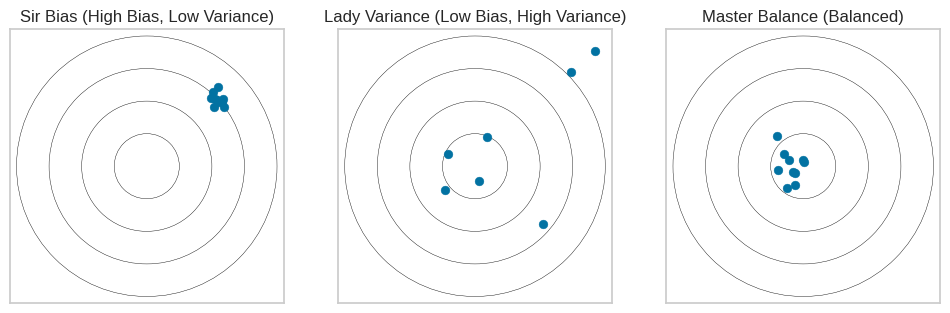

In [4]:
import matplotlib.patches as patches
import random

def draw_target(ax):
    center = (0,0)
    for r in [1.0, 0.75, 0.5, 0.25]:
        circ = patches.Circle(center, r, fill=False)
        ax.add_patch(circ)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-1.05, 1.05)
    ax.set_ylim(-1.05, 1.05)
    ax.set_xticks([]); ax.set_yticks([])

def scatter_arrows(ax, points):
    xs, ys = zip(*points)
    ax.scatter(xs, ys, s=40)

def scenario_points(kind):
    if kind == "high_bias":
        base = np.array([0.5, 0.5])
        return [tuple(base + 0.05*np.random.randn(2)) for _ in range(10)]
    if kind == "high_variance":
        return [tuple(0.6*np.random.randn(2)) for _ in range(10)]
    if kind == "balanced":
        return [tuple(0.12*np.random.randn(2)) for _ in range(10)]

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131)
draw_target(ax1)
scatter_arrows(ax1, scenario_points("high_bias"))
ax1.set_title("Sir Bias (High Bias, Low Variance)")

ax2 = fig.add_subplot(132)
draw_target(ax2)
scatter_arrows(ax2, scenario_points("high_variance"))
ax2.set_title("Lady Variance (Low Bias, High Variance)")

ax3 = fig.add_subplot(133)
draw_target(ax3)
scatter_arrows(ax3, scenario_points("balanced"))
ax3.set_title("Master Balance (Balanced)")

plt.show()

##  The Sacred Equation
**How can one create a model from a sample of data that’ll predict well on another, unseen sample of data?**


For a point \(x\), if $\hat{f}(x)$ is our model’s prediction and \(y\) is the true target, then the **expected squared error** decomposes as:
$$
\mathbb{E} \left[ (y - \hat{f}(x))^2 \right]
= \underbrace{\sigma^2}_{\text{irreducible noise}}
+ \underbrace{\left( \mathbb{E}[\hat{f}(x)] - f(x) \right)^2}_{\text{bias}^2}
+ \underbrace{\mathbb{E} \left[ \left( \hat{f}(x) - \mathbb{E}[\hat{f}(x)] \right)^2 \right]}_{\text{variance}}
$$




- **Bias²**: systematic error from overly simple assumptions (like Sir Bias).
- **Variance**: sensitivity to the particular training sample (like Lady Variance).
- **Irreducible noise** $\sigma^2$: randomness we can’t remove (the wind).

The goal is **not** to eliminate both (impossible), but to **balance** them.

### Interpretation

- $\sigma^2$: irreducible error due to noise in the data  
- **Bias²**: squared difference between the average prediction and the true value  
- **Variance**: variability of predictions across different datasets


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from ipywidgets import interact, IntSlider, FloatSlider

def make_simple_sine_data(n=40, noise=0.3, seed=0):
    rng = np.random.RandomState(seed)
    X = 2 * np.pi * rng.rand(n, 1)

    def f(x):
        return np.sin(x)

    y = f(X).ravel() + noise * rng.randn(n)
    X_test = np.linspace(0, 2*np.pi, 200).reshape(-1, 1)
    y_true = f(X_test).ravel()

    return X, y, X_test, y_true

def bias_variance_visual(k=5, n=30, noise=0.3, n_rounds=10, seed=0):
    X_grid = np.linspace(0, 2*np.pi, 200).reshape(-1, 1)
    y_true_grid = np.sin(X_grid).ravel()

    rng = np.random.RandomState(seed)
    seeds = rng.randint(0, 10_000, size=n_rounds)
    preds = []

    plt.figure(figsize=(8, 5))

    for s in seeds:
        Xs, ys, _, _ = make_simple_sine_data(n=n, noise=noise, seed=int(s))
        m = KNeighborsRegressor(n_neighbors=int(k))
        m.fit(Xs, ys)
        y_pred = m.predict(X_grid)
        preds.append(y_pred)
        plt.plot(X_grid, y_pred, color='gray', alpha=0.3)

    preds = np.array(preds)
    mean_pred = preds.mean(axis=0)
    var_pred = preds.var(axis=0)
    bias2 = (mean_pred - y_true_grid) ** 2

    plt.plot(X_grid, y_true_grid, 'g-', label='True function')
    plt.plot(X_grid, mean_pred, 'r-', label='Average prediction')

    example_x = 100
    plt.scatter(X_grid[example_x], y_true_grid[example_x], color='g', zorder=5)
    plt.scatter(X_grid[example_x], mean_pred[example_x], color='r', zorder=5)
    plt.vlines(X_grid[example_x],
               y_true_grid[example_x],
               mean_pred[example_x],
               colors='blue',
               linestyles='dashed',
               label='Bias at x0')

    plt.title(f"KNN Bias–Variance Illustration (k={k})")
    plt.legend()
    plt.show()

    print(f"Mean Bias² over grid: {bias2.mean():.4f}")
    print(f"Mean Variance over grid: {var_pred.mean():.4f}")
    print(f"Proxy Irreducible Error: {noise**2:.4f}")
    print(f"Estimated Total Error: {bias2.mean() + var_pred.mean() + noise**2:.4f}")

interact(
    bias_variance_visual,
    k=IntSlider(min=1, max=30, step=1, value=5, description="k"),
    n=IntSlider(min=10, max=200, step=5, value=30, description="n"),
    noise=FloatSlider(min=0.0, max=1.0, step=0.05, value=0.3, description="noise"),
    n_rounds=IntSlider(min=2, max=100, step=2, value=10, description="rounds"),
    seed=IntSlider(min=0, max=999, step=1, value=0, description="seed")
);

interactive(children=(IntSlider(value=5, description='k', max=30, min=1), IntSlider(value=30, description='n',…


### Bias–Variance Tradeoff Explained
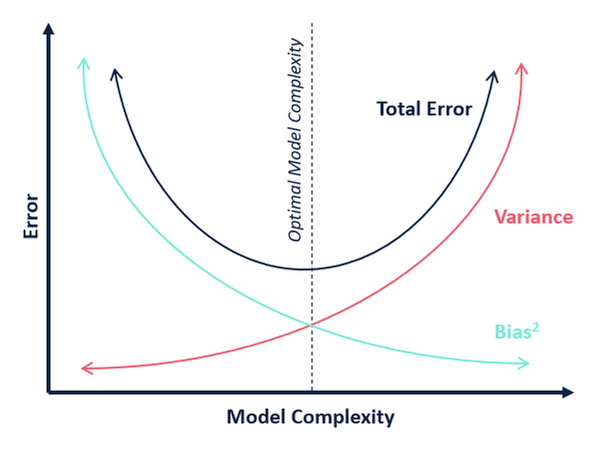

Think of this graph like **dating styles**:

- **Bias² (Green curve)** → The person who’s *too picky and rigid*.  
  They stick to their “type” so strictly that they miss great matches.  
  This is **high bias** —> not adapting well to different situations.

- **Variance (Red curve)** → The person who changes their personality  
  every time they meet someone new. Super flexible but wildly inconsistent.  
  This is **high variance** —> perfect for one case, a disaster for another.

- **Total Error (Black curve)** → The **heartbreak count** .  
  Too rigid? Too chaotic? Both will make it worse.  
  Somewhere in the middle is your **sweet spot** —> the  
  **optimal model complexity** where heartbreak is minimized.

- **Model Complexity (X-axis)** → As you move right, the “model”  
  gets more adaptable (or complicated). Too far right, variance explodes;  
  too far left, bias rules.

- **Underfitting** → Too rigid → High bias, low variance  
- **Overfitting** → Too adaptable → Low bias, high variance  
- **Best Models** → Balanced bias and variance → Lowest total error

**Golden Rule:**  
> The best model finds the sweet spot where **Bias² + Variance** is minimized.
